#  Risk assessment for Aircraft business expansion
## Introduction
As the company is expandind into aviation business it’s crucial to understand the risks that are usually being encountered. This project will use data science techniques to analyze factors that need aattention to make informed decision making.
## Objectives
The tasks that will be undertaken are:
- Importing the relevant libraries
- Opening and inspecting the contents of Aviation data CSV using pandas dataframes
- Data Cleaning
- Data visualization using the matplotlib library
- Providing insights and recommendations


## Business Understanding
The questions that are going to be answered for this project are:
- What are the trends in aviation accidents over time?
- What are the trends in Injuries Due to Aviation Accidents Over Time?
- What is the relationship between weather conditions and accident severity?
- Are there specific aircraft models that are involved in more accidents?
- Is there a correlation between the number of engines and number of accidents?
- Is there a relationship between the purpose of the plane and the number of accidents?
- Which countries or locations experience the highest number of aviation accidents

## Requirements
## 1. Load the relevant libraries and create a dataframe with pandas
We load the relevant libraries which include pandas, matplotlib, seaborn and numpyy then Create a dataframe df and that represent the AviationData CSV file. Use pandas methods to inspect the data.

## 2. Data Understanding and Preparation
This step involves checking the data to undestand its structure and check for errors hence selecting the relevant methods to handle the errors ensureing that the dataset is ready to be used for analysis

## 3. Answering the business questions

### 1. Load the relevant libraries and create a dataframe with pandas
In the cell below, we:

- Import and alias pandas as pd
- Import and alias numpy as np
- Import and alias seaborn as sns
- Import and alias matplotlib.pyplot as plt
- Set Matplotlib visualizations to display inline in the notebook

In [36]:
# loading relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

###  Loading aviation data into a dataframe (df) and viewing the first few datasets
In the cell below, load AviationData.csv as df and look at the first few samples in the dataset to get a feeling of how the data looks

In [37]:
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False);
df.head(5).T

,0,1,2,3,4
Event.Id,20001218X45444,20001218X45447,20061025X01555,20001218X45448,20041105X01764
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Accident.Number,SEA87LA080,LAX94LA336,NYC07LA005,LAX96LA321,CHI79FA064
Event.Date,1948-10-24,1962-07-19,1974-08-30,1977-06-19,1979-08-02
Location,"MOOSE CREEK, ID","BRIDGEPORT, CA","Saltville, VA","EUREKA, CA","Canton, OH"
Country,United States,United States,United States,United States,United States
Latitude,NaN,NaN,36.922223,NaN,NaN
Longitude,NaN,NaN,-81.878056,NaN,NaN
Airport.Code,NaN,NaN,NaN,NaN,NaN
Airport.Name,NaN,NaN,NaN,NaN,NaN


### 2. Data Understanding and Preparation

This step includes:

- Understanding the dimensionality of your dataset
- Investigating what type of data it contains, and the data types used to store it
- Discovering how missing values are encoded, and how many there are
- Preparing data for analysis

In [38]:
# checking the information in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Interpretation of the above results
From the above we can see that there are 31 colums and 88889 columns.
We have five columns with floating data type and the rest are strings.
We can also see that most of the columns have missing datasets which need to be corrected in an appropriate manner for accurate results. 

### Data preparation
#### Checking for null values
The first task is to check for null values in each colum so that we can choose the best method for filling the null values

In [39]:
# Checking for number of null values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

#### Selecting relevant columns to answer our business questions

In [40]:
# code that selects onl the relevant columns
df = df[['Accident.Number',
        'Event.Date',
        'Location',
        'Country',
        'Investigation.Type',
        'Injury.Severity',
        'Registration.Number',
        'Make',
        'Model',
        'Amateur.Built',
        'Number.of.Engines',
        'Engine.Type',
        'Purpose.of.flight',
        'Total.Fatal.Injuries',
        'Total.Serious.Injuries',
        'Total.Minor.Injuries',
        'Total.Uninjured',
        'Weather.Condition'
        ]]
# Inspect the first few rows
df.head().T

,0,1,2,3,4
Accident.Number,SEA87LA080,LAX94LA336,NYC07LA005,LAX96LA321,CHI79FA064
Event.Date,1948-10-24,1962-07-19,1974-08-30,1977-06-19,1979-08-02
Location,"MOOSE CREEK, ID","BRIDGEPORT, CA","Saltville, VA","EUREKA, CA","Canton, OH"
Country,United States,United States,United States,United States,United States
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Injury.Severity,Fatal(2),Fatal(4),Fatal(3),Fatal(2),Fatal(1)
Registration.Number,NC6404,N5069P,N5142R,N1168J,N15NY
Make,Stinson,Piper,Cessna,Rockwell,Cessna
Model,108-3,PA24-180,172M,112,501
Amateur.Built,No,No,No,No,No


#### Handling Errors in data
##### Determining the best methods for data cleaning
We will begin by filling the null values

In [41]:
# checking df null information
df.isnull().sum()

Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Investigation.Type            0
Injury.Severity            1000
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [42]:
# checking summary of the numerical columns in our dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [43]:
# Filling missing categorical values
df['Location'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Weather.Condition'].fillna('UNK', inplace=True)
df['Make'].fillna('Unknown', inplace=True)
df['Model'].fillna('Unknown', inplace=True)
df['Purpose.of.flight'].fillna('Unknown', inplace=True)

# Filling missing numerical values
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mode()[0], inplace=True)

injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].fillna(0)


For handling the missing values for this columns, I chose to replace the missing value as follows:
- Mode for Number.of.Engines ensures the most common value (1) is used instead of mean (which is slightly skewed).
- Zero for injury counts is logical because if injuries were significant, they would likely be recorded.
- "Unknown" for categorical fields prevents errors during analysis

#### Checking for unique values in ['Weather.Condition'] coloumn

In [44]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', 'Unk'], dtype=object)

#### Replacing the Unk with UNK in 'Weather.Condition' coloumn

In [45]:
# Create a copy of the DataFrame to avoid error message
df = df.copy()

# Replace 'Unk' with 'UNK'
df['Weather.Condition'] = df['Weather.Condition'].replace('Unk', 'UNK')

# Check the unique values again
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

#### Replacing the Unk with UNK in 'Engine.Type' coloumn

In [46]:
df = df.copy()

# Replace 'Unk' with 'UNK'
df['Engine.Type'] = df['Engine.Type'].replace('Unknown', 'UNK')

# Check the unique values again
df['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'UNK',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE'], dtype=object)

#### Checking for outliers
Outliers are data points that differ significantly from other observations. Identifying and handling them is crucial because they can impact data analysis and decision-making.

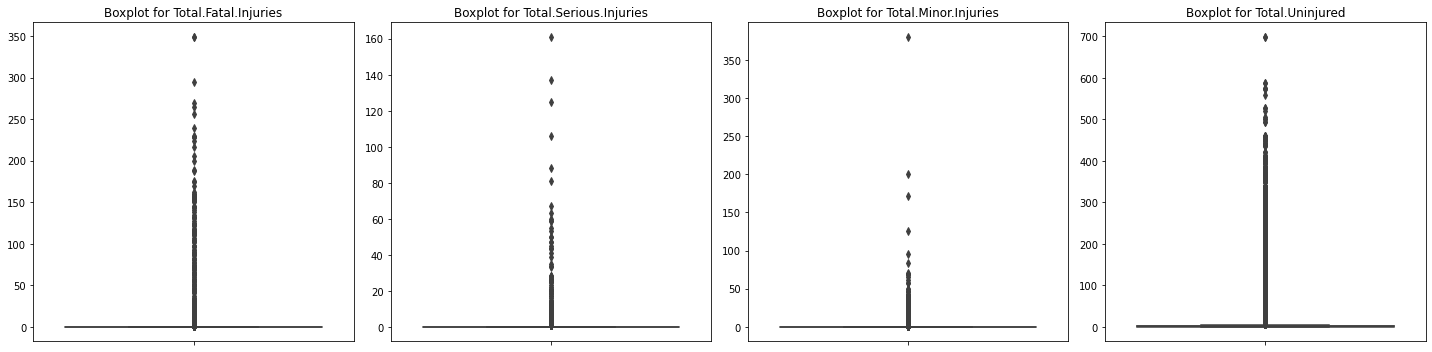

In [47]:
# Define the columns to visualize
cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Create a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

# Loop through each column and plot the boxplot in a subplot
for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_ylabel('')  # Remove y-label for a cleaner look

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Extreme values make sense in our datasets hence we will keep them. If we had data errors, we would have to work with the IQR to remove them.

#### Filter dates
we are working from the year 1962 to 2023 hence we should ensure we have the right datasets

In [48]:
# Convert Event.Date to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Filter data from 1962 to 2023
df = df[(df['Event.Date'].dt.year >= 1962) & (df['Event.Date'].dt.year <= 2023)]

## Question 1: What are the trends in aviation accidents over time?

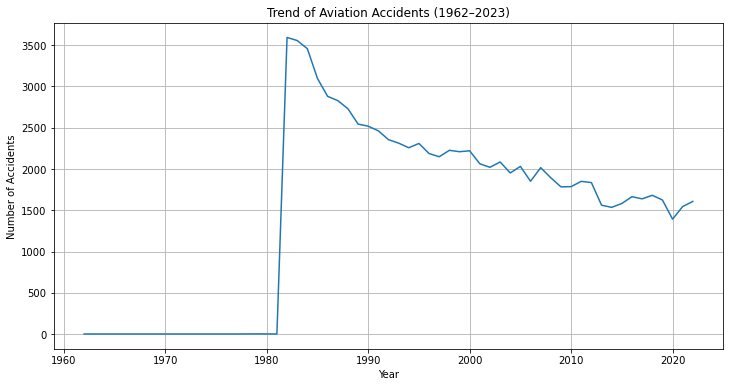

In [49]:
# Extract year
df['Year'] = df['Event.Date'].dt.year

# Count accidents per year
accidents_per_year = df.groupby('Year').size()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Trend of Aviation Accidents (1962–2023)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### Answer
From the above data visualization, we can observe that there has been an overall drop of aviation accidents from 1982 to the year 2023.
In the year 1982 we had the highest record of aviation accidents and 2020 having the lowest as the current lowest aviation accident recorded.
From the year 1963 to 1981 we had the lowest aviation accidents recorded.

## Question 2: What are the trends in Injuries Due to Aviation Accidents Over Time?

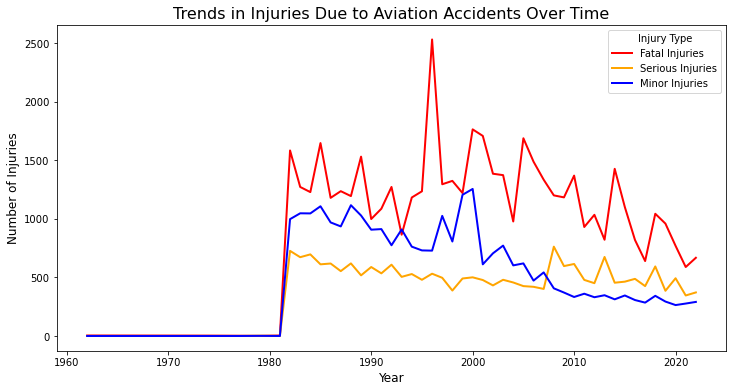

In [50]:
# Convert Event.Date to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract year from Event.Date
df['Year'] = df['Event.Date'].dt.year

# Group by Year and sum the injuries
injury_trends = df.groupby('Year')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=injury_trends.index, y=injury_trends['Total.Fatal.Injuries'], label='Fatal Injuries', color='red', linewidth=2)
sns.lineplot(x=injury_trends.index, y=injury_trends['Total.Serious.Injuries'], label='Serious Injuries', color='orange', linewidth=2)
sns.lineplot(x=injury_trends.index, y=injury_trends['Total.Minor.Injuries'], label='Minor Injuries', color='blue', linewidth=2)

# Adding titles and labels
plt.title('Trends in Injuries Due to Aviation Accidents Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Injuries', fontsize=12)

# Show legend
plt.legend(title='Injury Type')

# Show the plot
plt.show()

### Answer
From the lineplot above we can observe that we have high records of fatal accidents followed by the minor injuries and finally serious injuries until the year 2008 where serious injuries are higher than minor injuries untill the year 2023.

Both Fatal, serious and minor injuries have been recorded to be reducing gradually over the year.

## Question 3: Do weather conditions influence accidents

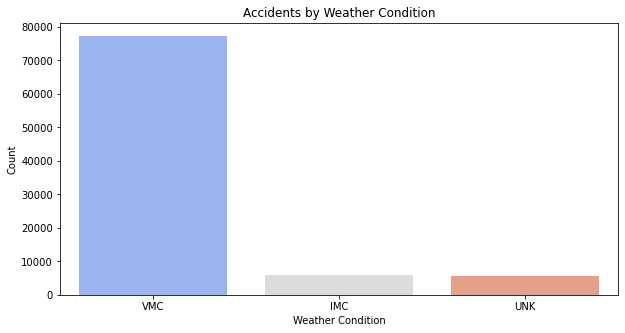

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Weather.Condition'], order=df['Weather.Condition'].value_counts().index, palette='coolwarm')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

### Answer
From the above visualization: It turns out that accidents are mainly experienced during visual meteorological conditions (VMC) compared to instrument meteorological conditions (IMC) which might seem counterintuitive as one might expect more accidents in poorer visibility conditions 

## Question 4: Are there specific aircraft models that are involved in more accidents?

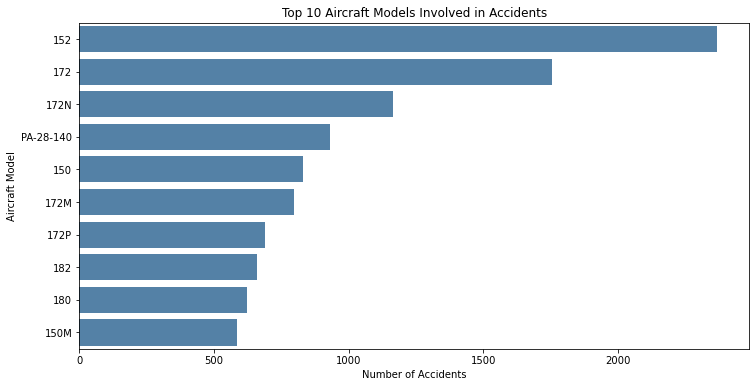

In [52]:
top_models = df['Model'].value_counts().nlargest(10)  # Top 10 most frequent models

plt.figure(figsize=(12,6))
sns.barplot(x=top_models.values, y=top_models.index, color='steelblue')
plt.title('Top 10 Aircraft Models Involved in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Model')
plt.show()

### Answer
The aircraft model 152 has the highest accident count, with just over 2000 accidents. This is significantly higher than any other model listed on the graph. Followed by model 172 with accidents over 1500 recorded. This shows that models with high accident records  like 152, 172 and 172N are likely to be in an accidet compared to other models.

## Question 5: Is there a correlation between the number of engines and number of accidents?

Correlation between Number of Engines and Number of Accidents: -0.429253383633823


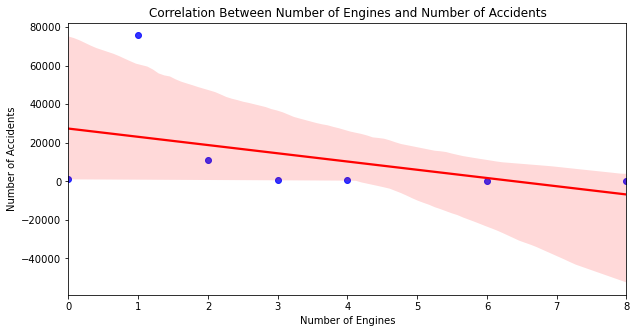

In [53]:
# Group by number of engines and count accidents
accidents_by_engines = df.groupby('Number.of.Engines').size().reset_index(name='Number.of.Accidents')

# Calculate correlation
correlation = accidents_by_engines['Number.of.Engines'].corr(accidents_by_engines['Number.of.Accidents'])
print(f'Correlation between Number of Engines and Number of Accidents: {correlation}')

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x=accidents_by_engines['Number.of.Engines'], 
            y=accidents_by_engines['Number.of.Accidents'], 
            scatter_kws={'color': 'blue'}, 
            line_kws={'color': 'red'})

# Labels and title
plt.title('Correlation Between Number of Engines and Number of Accidents')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')

plt.show()

### Answer
- Scatter plot above shows relationship between the number of engines and the number of recorded accidents.
- We can also observe that Correlation between Number of accidents and Number of engines is a weak negative correlation of -0.42925333836.

## Question 6: Is there a relationship between the purpose of the flight and the number of accidents?

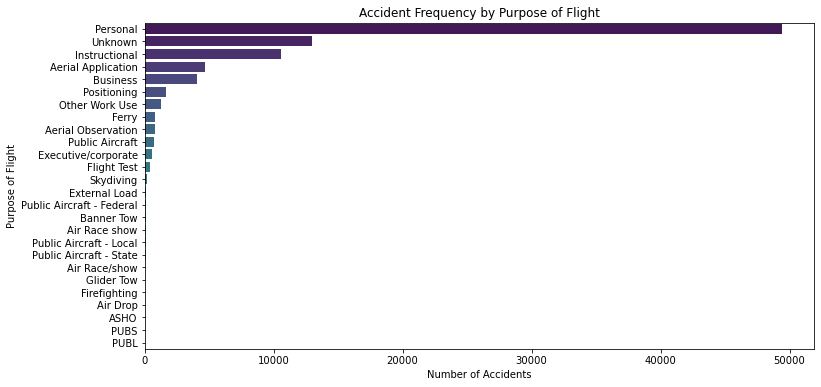

In [54]:
# Plotting accident counts by flight purpose
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Purpose.of.flight'], order=df['Purpose.of.flight'].value_counts().index, palette="viridis")
plt.xlabel("Number of Accidents")
plt.ylabel("Purpose of Flight")
plt.title("Accident Frequency by Purpose of Flight")
plt.show()

### Answer
- From the above visualization we can observe that personal flights have the highest record of number of accidents of over 4000.
- For the other purposes of flight each has a records of less than 2000 with flight test with the least.

## Question 7: Which countries or locations experience the highest number of aviation accidents?

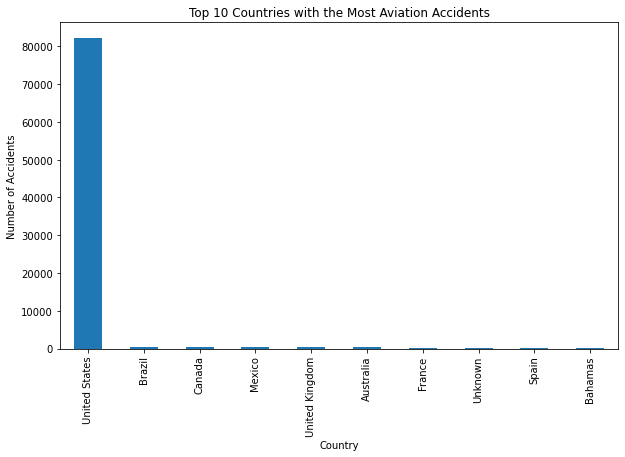

In [55]:
country_accidents = df['Country'].value_counts().head(10)
country_accidents.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries with the Most Aviation Accidents')
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.show()

### Answer
As seen from the visualization above, the United states is the most dominant country in our dataset with over 90% of data.

### Csv data download for visualization in Tableau

In [56]:
# saving csv for the cleaned df file
df.to_csv('cleanedAviationData.csv', index=False)

# Group by 'Purpose.of.flight' and count the accidents to acquire data for only the purpose of flight and Number of accidents
accidents_by_purpose = df.groupby('Purpose.of.flight').size().reset_index(name='Number of Accidents')

accidents_by_purpose.to_csv('accidents_by_purpose.csv', index=False) # saving csv

# Trends of aviation accidents over time csv download
accidents_per_year = df.groupby('Year').size().reset_index(name='Number of Accidents')
accidents_per_year.to_csv('accidents_per_year.csv', index = False)

# Count occurrences of each weather condition
weather_counts = df['Weather.Condition'].value_counts().reset_index()
weather_counts.columns = ['Weather Condition', 'Count']

# Save to CSV
weather_counts.to_csv('weather_accident_counts.csv', index=False)

## Findings:

In this project we analyzed aviation safety using NTSB data and the following were the findings drawn from the analysis:

1. There has been an overall drop of aviation accidents from the year 1982 to the year indicating that aviation is getting safer.

2. Over the years we have high records of fatal accidents followed by the minor injuries and finally serious injuries until the year 2008 where serious injuries are higher than minor injuries untill the year 2023. This could be due to the designs of planes used from the year 2008.

3. Most accidents occur under Visual Meteorological Conditions (VMC). This could be due to the higher frequency of flights in VMC compared to other weather conditions.

4. The aircraft model `152` has the highest accident count, making it the model most frequently involved in accidents among those listed. This could be due to their design hence prone to errors.

5. Aircraft with fewer engines tend to have higher injury counts, while those with more engines tend to have lower injury counts.

6. Most of the personal purpose flights have the highest recors of accidents and this could be due to poor maintainance of the planes for personal use. 

7. Most accidents occur in United states. This could be due to the high traffic and weather conditions.

## Reccomendations:
Based on the findings above, i would reccomend:
1. Prioritize Aircraft Maintenance and Inspection. Since personal-purpose flights have the highest accident records, likely due to poor maintenance, invest in strict and frequent maintenance schedules.
2. Choose Aircraft Models with Strong Safety Records. The Cessna 152 has the highest accident count, possibly due to design flaws.
Conduct a thorough risk assessment of aircraft models before purchasing or leasing.
Opt for models with better safety features and lower accident rates.
3. Train Pilots and Crew on Safety Best Practices. Even though most accidents happen in Visual Meteorological Conditions (VMC), pilot error is still a significant factor and Simulate adverse weather conditions training even for VMC scenarios to improve situational awareness.
4. Focus on Route and Air Traffic Analysis. Since most accidents occur in the United States, analyze high-risk areas and plan routes strategically to avoid congested airspaces.
Utilize advanced GIS and geospatial analytics to map accident-prone zones and create safer flight paths.
5. Invest in Multi-Engine Aircraft for Enhanced Safety. Analysis shows that aircraft with fewer engines tend to have higher injury counts. If possible, invest in multi-engine aircraft, especially for longer and high-risk routes, to increase redundancy and minimize risks in case of engine failure.
6. Improve Data-Driven Safety Measures. Use historical accident data to predict high-risk factors and integrate AI-powered risk assessment tools.
7. Consider Insurance and Safety Protocols
Given the accident trends, ensure comprehensive insurance coverage for aircraft, passengers, and crew.

## Conclusion:
Our analysis of aviation accident data highlights key risk factors that must be addressed before starting the aviation business. While aviation safety has improved over the years, factors such as aircraft model choice, purpose of the aircraft maintenance practices, pilot training, and flight conditions play a critical role in accident prevention. By implementing data-driven safety measures, investing in well-maintained multi-engine aircraft, and adhering to strict operational standards, we can mitigate risks and enhance flight safety. These insights will guide strategic decisions to ensure a safe and sustainable aviation operatio